1. Open and read the "Khmer_Food.txt" file

In [1]:
import nltk

file_path = 'C:/Users/user/Documents/CADT/Term10/NLP/MINI/Mini-Project-1-Text-Generation/Food_Update.txt'

with open(file_path, encoding='utf-8') as infile:
    file_content = infile.read()

# tokenize sentences
sentences = nltk.sent_tokenize(file_content)

print("Number of sentences in the file:", len(sentences))

Number of sentences in the file: 1372


2. Split Data into train (70%), test(20%), val(10%)

In [2]:
from sklearn.model_selection import train_test_split

# Assuming 'sentences' is your data from the previous code snippet
# If not, replace it with the appropriate variable holding your data

# Split the data into train, test, and validation sets
train_data, temp_data = train_test_split(sentences, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.1, random_state=42)

# Print the number of sentences in each set
print("Number of sentences in the training set:", len(train_data))
print("Number of sentences in the testing set:", len(test_data))
print("Number of sentences in the validation set:", len(val_data))

print("Training set:")
print(train_data)

print("\nTesting set:")
print(test_data)

print("\nValidation set:")
print(val_data)

Number of sentences in the training set: 960
Number of sentences in the testing set: 370
Number of sentences in the validation set: 42
Training set:
["As a result of historical migrations, colonisation by foreign powers, and its geographical position within its wider home region, Malaysia's culinary style in the present day is primarily a melange of traditions from its Malay, Chinese, Indian, Indonesian, Filipino and indigenous Bornean and Orang Asli, with light to heavy influences from Arab, Thai, Portuguese, Dutch and British cuisines, to name a few.", 'Hard stinky tofu is often deep-fried and paired with soy sauce or salty spice.', 'The lake is home to 75 species of freshwater fish, including landlocked marine species that have since adapted to the Taal lake environment.', 'Owing to the drastic differences in climate and lifestyles throughout the three main regions of Vietnam, the foods vary.', 'The egg pie with a very rich egg custard filling is a mainstay in local bakeries.', 'It 

3. Preprocessing 

    a. Lower Case

    b. Remove punctuation

    c. Remove Stop word

    d. Tokenization

    e. Limit the vocabulary size and replace the rest of the tokens as < unk >  

In [3]:
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def preprocess_data(sentences, vocab_size):
    preprocessed_data = []
    
    for sentence in sentences:
        # Lowercasing
        sentence = sentence.lower()
        
        # Remove punctuation
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        
        # Tokenization
        tokens = word_tokenize(sentence)
        
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        
        # Limit vocabulary size and replace the rest with <unk>
        tokens = tokens[:vocab_size] + ['<unk>'] * max(0, len(tokens) - vocab_size)
        
        preprocessed_data.append(tokens)
    
    return preprocessed_data

# Vocabulary size (adjust as needed)
vocab_size = 1000

# Apply preprocessing to each subset
train_corpus_preprocessed = preprocess_data(train_data, vocab_size)
test_corpus_preprocessed = preprocess_data(test_data, vocab_size)
val_corpus_preprocessed = preprocess_data(val_data, vocab_size)

# Print preprocessed sets
print("\nTraining set after preprocessing:")
print(train_corpus_preprocessed)

print("\nTesting set after preprocessing:")
print(test_corpus_preprocessed)

print("\nValidation set after preprocessing:")
print(val_corpus_preprocessed)


Training set after preprocessing:
[['result', 'historical', 'migrations', 'colonisation', 'foreign', 'powers', 'geographical', 'position', 'within', 'wider', 'home', 'region', 'malaysias', 'culinary', 'style', 'present', 'day', 'primarily', 'melange', 'traditions', 'malay', 'chinese', 'indian', 'indonesian', 'filipino', 'indigenous', 'bornean', 'orang', 'asli', 'light', 'heavy', 'influences', 'arab', 'thai', 'portuguese', 'dutch', 'british', 'cuisines', 'name'], ['hard', 'stinky', 'tofu', 'often', 'deepfried', 'paired', 'soy', 'sauce', 'salty', 'spice'], ['lake', 'home', '75', 'species', 'freshwater', 'fish', 'including', 'landlocked', 'marine', 'species', 'since', 'adapted', 'taal', 'lake', 'environment'], ['owing', 'drastic', 'differences', 'climate', 'lifestyles', 'throughout', 'three', 'main', 'regions', 'vietnam', 'foods', 'vary'], ['egg', 'pie', 'rich', 'egg', 'custard', 'filling', 'mainstay', 'local', 'bakeries'], ['considered', 'blend', 'chinese', 'malay', 'cooking', 'influenc

4. EDA

In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


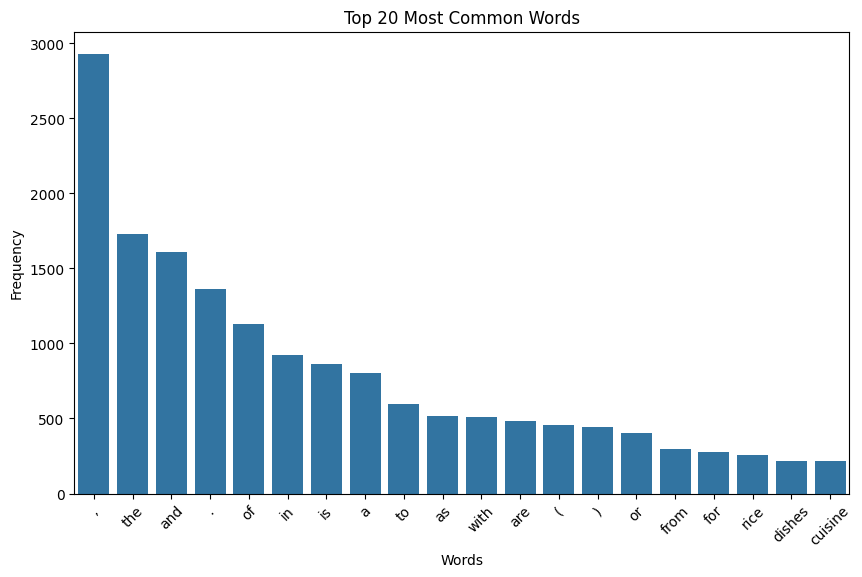

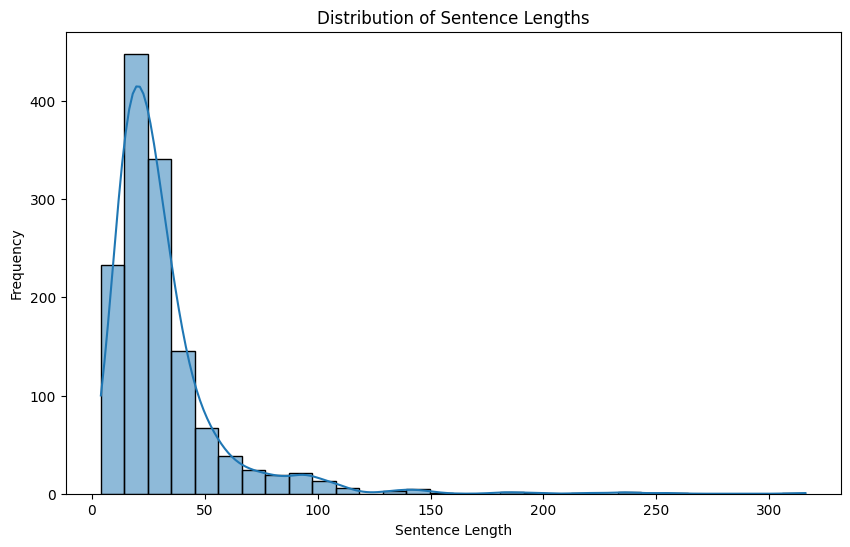

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize the entire corpus
tokens = word_tokenize(file_content.lower())

# Frequency Distribution of words
freq_dist = FreqDist(tokens)

# Plot the top N most common words
top_words = freq_dist.most_common(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of sentence lengths
sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()